**This is to connect colab to google drive**

In [136]:
#from google.colab import drive
#drive.mount('/content/drive')

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

**Read csv file and convert to pandas DataFrame**

In [139]:
auto = pd.read_csv("C:/Users/stunn/Notebook/auto-mpg-2.csv", header=0)
auto.head()

#header=0 means column names are taken from the first row. header=none for no header

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**CHECK MULTICOLLINEARITY**

**Method 1: Scatter Matrix**

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='model year', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='model year', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='w

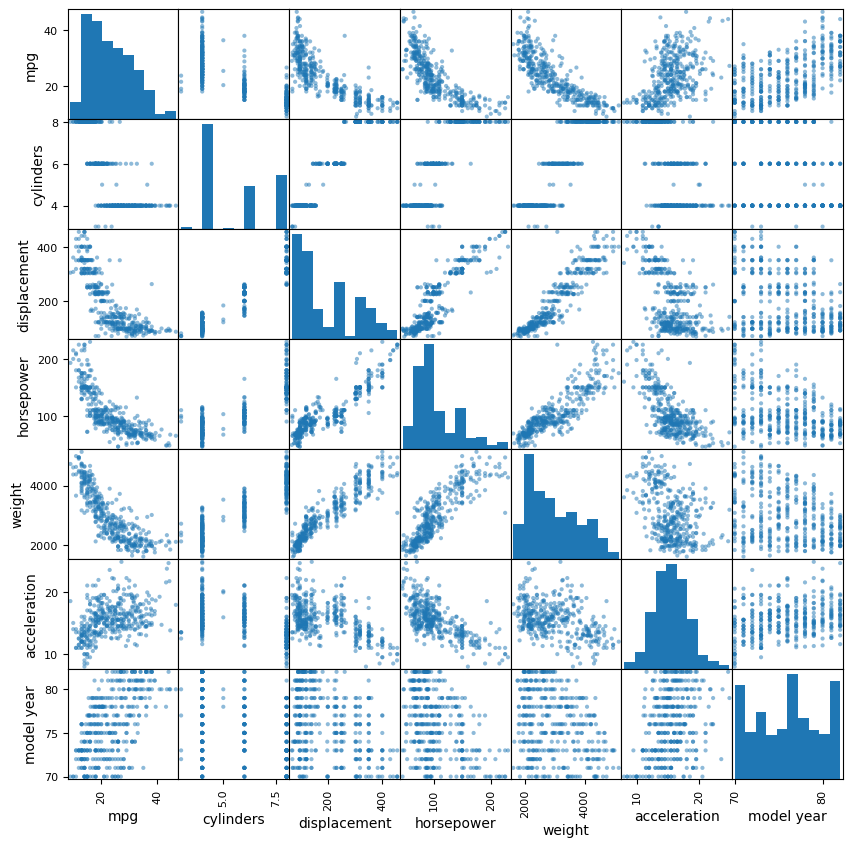

In [142]:
#Check scatter matrix to see which variables could have linear relationships with dependant variable

df = auto[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
pd.plotting.scatter_matrix(df, figsize = (10, 10))

**Method 2: Heatmap**

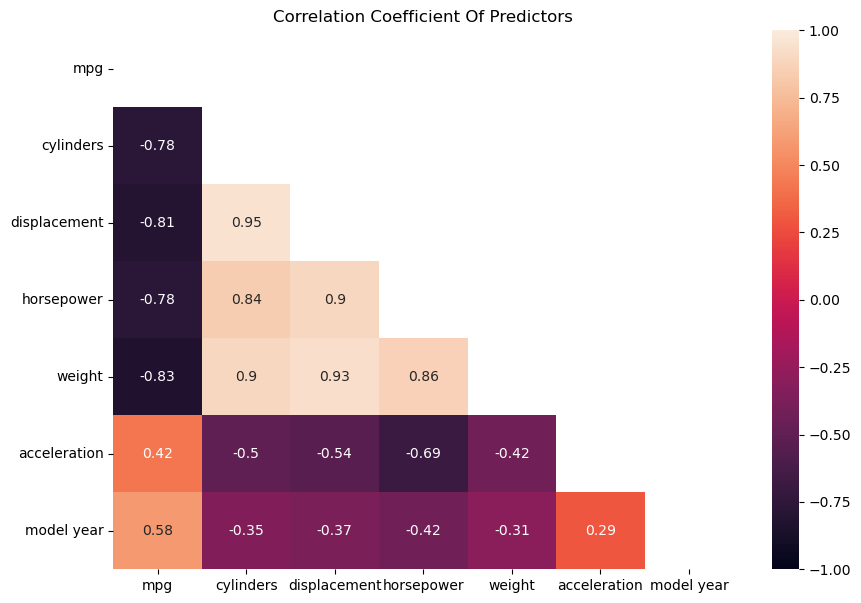

In [144]:
# Check multicollinearity
plt.figure(figsize=(10,7))

# Only look at bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()


**Method 3: VIF**

In [146]:
# compute the vif for all given features
def compute_vif(considered_features):

    X = df.loc[:,considered_features]         #X = df[considered_features]    #deprecated

    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [147]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
dtype: object

In [148]:
# Look at VIF for all the numeric
considered_features = ['cylinders', 'displacement', 'weight', 'acceleration']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
1,displacement,18.197068
0,cylinders,10.519989
2,weight,8.541702
3,acceleration,1.560695


Displacement, Cylinder and Weight have VIF > 5, so we can remove them one by one to evaluate

In [150]:
considered_features = ['cylinders', 'weight', 'acceleration']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,cylinders,5.753261
1,weight,5.189592
2,acceleration,1.353946


Now we remove cylinders

In [152]:
considered_features = ['weight', 'acceleration']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,weight,1.210295
1,acceleration,1.210295


## Scatter plot using Matplotlib

We can try to determine mpg based on weight and acceleration

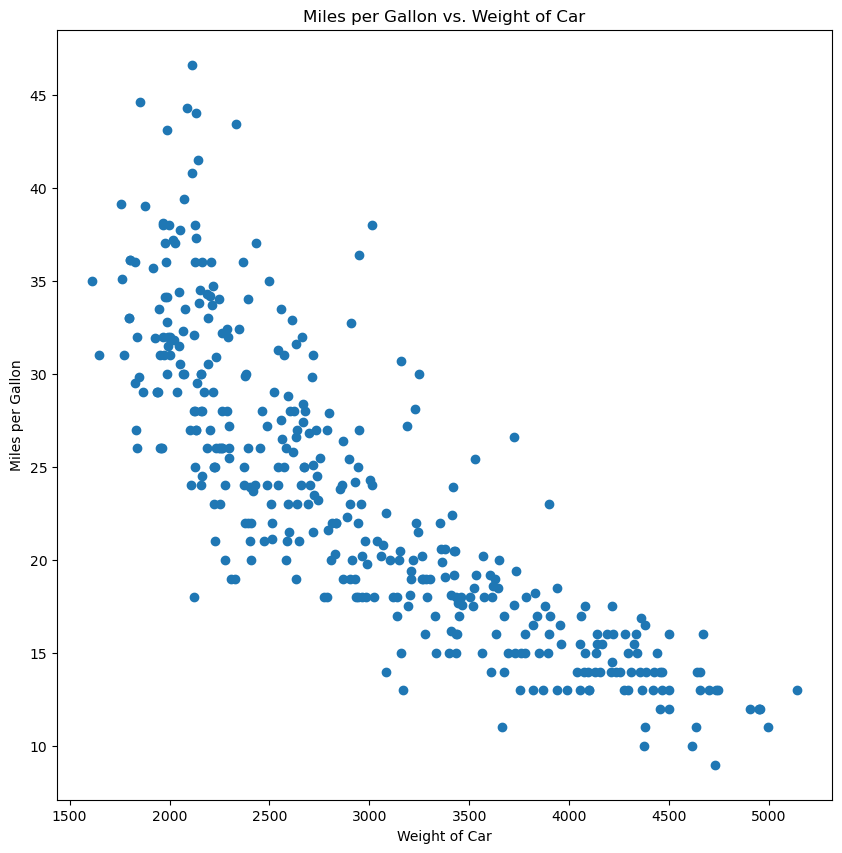

In [155]:
plt.figure(figsize=(10,10))
plt.scatter(auto['weight'],auto['mpg'])
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()

## Defining Features and Labels

In [157]:
X = auto[['weight']]
y = auto['mpg']

## Train model

In [159]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

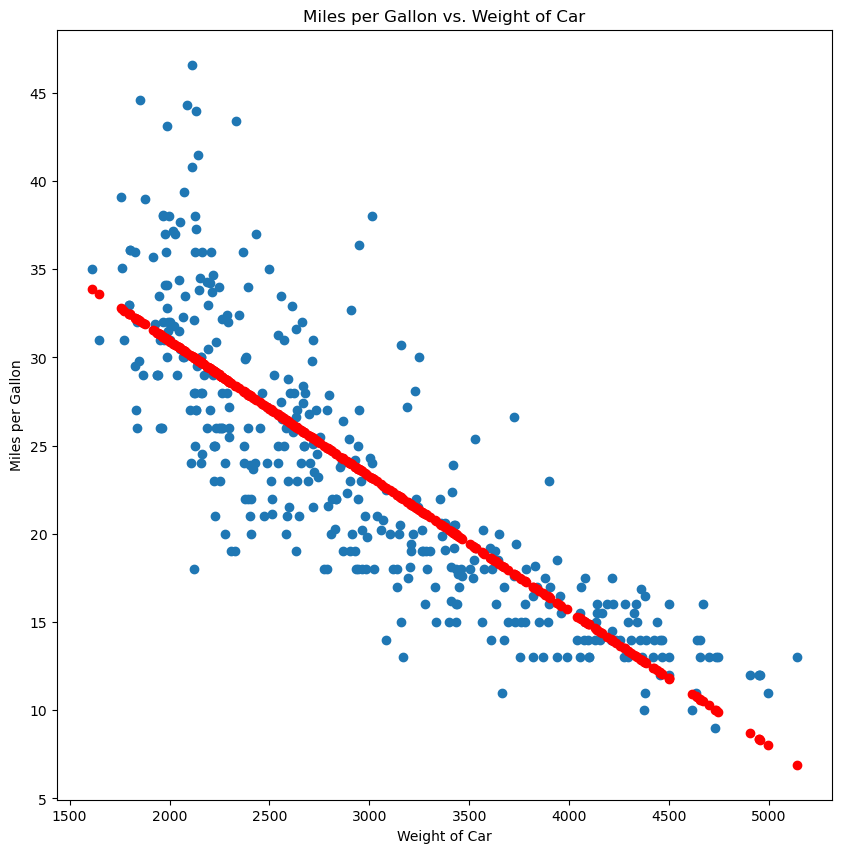

In [160]:
plt.figure(figsize=(10,10))
plt.scatter(auto['weight'], auto['mpg'])
plt.scatter(X,model.predict(X), c='Red')                       #gives the red line
plt.title('Miles per Gallon vs. Weight of Car')
plt.xlabel('Weight of Car')
plt.ylabel('Miles per Gallon')
plt.show()

In [161]:
# printing the intercepts, coefficients and Rsquared
print(model.intercept_, model.coef_, model.score(X, y))

46.21652454901758 [-0.00764734] 0.6926304331206254


In [162]:
mse = mean_squared_error(model.predict(X), y)
print (mse)

18.6766165974193


## Distribution of residuals

In [164]:
residuals = y - model.predict(X)

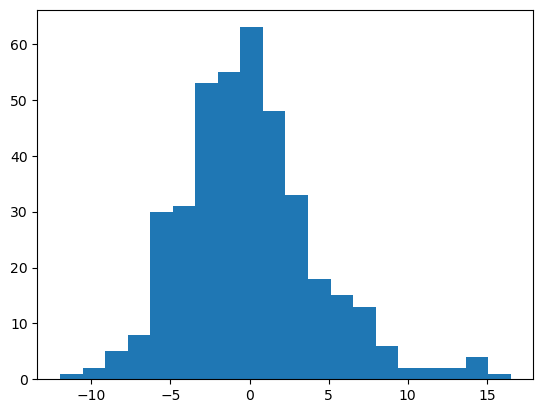

In [165]:
plt.hist(residuals, bins=20)
plt.show()

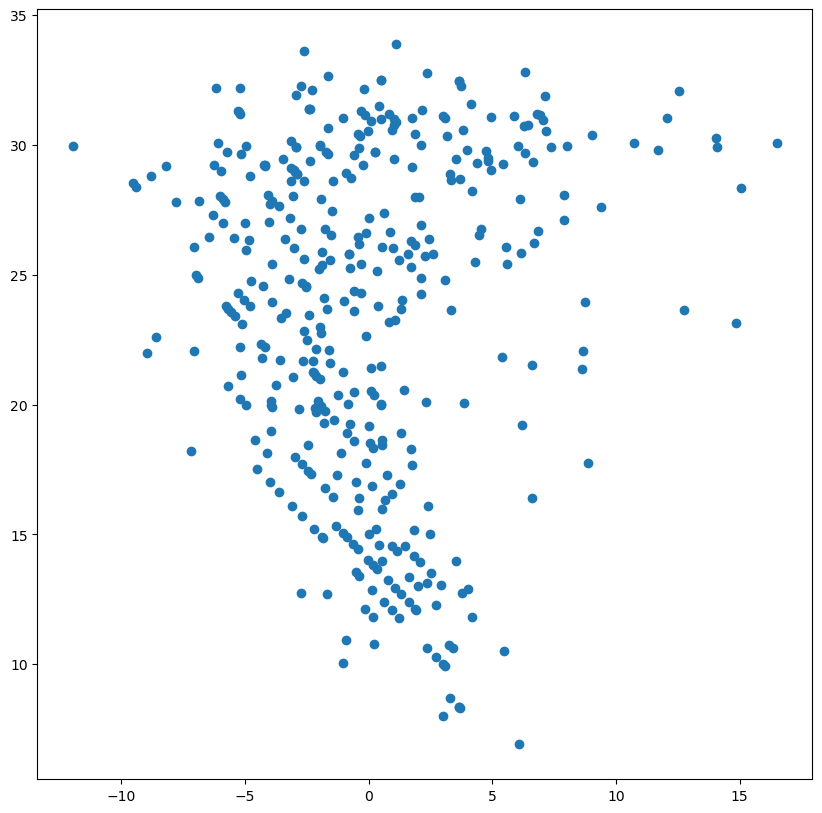

In [166]:
plt.figure(figsize=(10,10))
plt.scatter(residuals, model.predict(X))

plt.show()

## OLS (Ordinary Least Squares)
Optimization strategy for linear regression

In [168]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          6.02e-102
Time:                        02:35:34   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

In [169]:
#The test for homoscedacity
white_test = het_white(model.resid,  model.model.exog)
#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)
# p-value less than 0.05 implies homoscedacity

[('Lagrange multiplier statistic', 22.709242569521706),
 ('p-value', 1.1715224944729097e-05),
 ('f-value', 11.960623413662042),
 ('f p-value', 9.099577245908038e-06)]

## Examining a multi linear model

In [171]:
X = auto[['weight', 'acceleration']]
y = auto['mpg']

In [172]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [173]:
# printing the intercepts, coefficients and Rsquared
print(model.intercept_, model.coef_, model.score(X, y))

41.09532877960423 [-0.0072931  0.2616504] 0.699697930474305


In [174]:
mse = mean_squared_error(model.predict(X), y)
print (mse)

18.247176104275912


In [175]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     453.2
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          2.43e-102
Time:                        02:35:34   Log-Likelihood:                -1125.4
No. Observations:                 392   AIC:                             2257.
Df Residuals:                     389   BIC:                             2269.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.0953      1.868     21.999   